# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os

# Loading data and select features

## Import Data

In [2]:
# Set data path for Kaggle
if os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost') == 'Interactive':
    loan_data_inputs_train = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_inputs_train.csv', index_col=0)
    loan_data_targets_train = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_targets_train.csv', index_col=0)
    loan_data_inputs_test = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_inputs_test.csv', index_col=0)
    loan_data_targets_test = pd.read_csv('/kaggle/input/creditrisk-train-test/loan_data_targets_test.csv', index_col=0)
    
else:
    loan_data_inputs_train = pd.read_csv('../data/loan_data_inputs_train.csv', index_col=0)
    loan_data_targets_train = pd.read_csv('../data/loan_data_targets_train.csv', index_col=0)
    loan_data_inputs_test = pd.read_csv('../data/loan_data_inputs_test.csv', index_col=0)
    loan_data_targets_test = pd.read_csv('../data/loan_data_targets_test.csv', index_col=0)

## Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_inputs_train.shape

(373028, 325)

In [5]:
loan_data_targets_train.shape

(373028, 1)

In [6]:
loan_data_inputs_test.shape

(93257, 325)

In [7]:
loan_data_targets_test.shape

(93257, 1)

## Select Features

In [8]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [9]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [10]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


# PD model estimation

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(inputs_train, loan_data_targets_train)

/home/danny/miniconda3/envs/dask/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
reg.intercept_

array([-0.42331201])

In [ ]:
reg.coef_

array([[ 0.95661301,  0.75097701,  0.56972441,  0.38891223,  0.23414829,
         0.06019956,  0.09107233,  0.10357338,  0.04316737,  0.06959456,
         0.0663156 ,  0.0705994 ,  0.08725677,  0.14685286,  0.11382941,
         0.19630467,  0.24234602,  0.23418572,  0.27480927,  0.33596615,
         0.49189205,  0.08288705, -0.01565145,  0.27378904,  0.17163237,
         0.17781097,  0.2315079 ,  0.05134325,  0.07191667,  0.10953448,
         0.13427551,  0.10208314,  0.06871146,  0.12917567,  1.12614334,
         0.93436006,  0.83601067,  0.64101598,  0.48044423,  0.235619  ,
        -0.01599717,  0.97470617,  0.62429586,  0.36109087,  0.15109467,
         0.07660743,  0.05822424,  0.10462854,  0.1417057 ,  0.14762215,
        -0.03517891, -0.06261865,  0.28779861,  0.14551345, -0.06341245,
         0.07111582, -0.03928697, -0.06285538, -0.08920642, -0.07380393,
        -0.04993862, -0.10534915,  0.13119273,  0.08966502, -0.02132435,
         0.03170864,  0.16152847,  0.04383066,  0.0

In [ ]:
feature_name = inputs_train.columns

In [ ]:
summary_table = pd.DataFrame(columns=["Feature Name"], data = feature_name)
summary_table["Coefficients"] = reg.coef_.transpose()
summary_table["index"] = summary_table.index + 1
summary_table = summary_table.sort_index()
summary_table.head(10)

,Feature Name,Coefficients,index
0,grade:A,0.956613,1
1,grade:B,0.750977,2
2,grade:C,0.569724,3
3,grade:D,0.388912,4
4,grade:E,0.234148,5
5,grade:F,0.060200,6
6,home_ownership:OWN,0.091072,7
7,home_ownership:MORTGAGE,0.103573,8
8,addr_state:NM_VA,0.043167,9
9,addr_state:NY,0.069595,10


## Logistic regression with P-values

In [11]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(np.array(F_ij, dtype='float64'))
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg = LogisticRegression_with_p_values()

In [ ]:
reg.fit(inputs_train, loan_data_targets_train["good_bad"])

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = reg.coef_.transpose()
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.423312
1,grade:A,0.956613
2,grade:B,0.750977
3,grade:C,0.569724
4,grade:D,0.388912
...,...,...
100,mths_since_last_record:3-20,0.203454
101,mths_since_last_record:21-31,0.127039
102,mths_since_last_record:32-80,0.296160
103,mths_since_last_record:81-86,-0.061997


In [ ]:
p_values = reg.p_values

In [ ]:
p_values = np.append(np.nan, np.array(p_values))

In [ ]:
summary_table['p_values'] = p_values

In [ ]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.423312,NaN
1,grade:A,0.956613,1.498113e-25
2,grade:B,0.750977,4.815936e-34
3,grade:C,0.569724,2.995418e-23
4,grade:D,0.388912,1.003991e-12
...,...,...,...
100,mths_since_last_record:3-20,0.203454,9.380406e-02
101,mths_since_last_record:21-31,0.127039,2.501333e-01
102,mths_since_last_record:32-80,0.296160,3.139719e-04
103,mths_since_last_record:81-86,-0.061997,4.818542e-01


In [12]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [13]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [14]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train["good_bad"])

In [18]:
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = reg2.coef_.transpose()
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.445985
1,grade:A,0.944051
2,grade:B,0.732144
3,grade:C,0.549044
4,grade:D,0.373379
...,...,...
80,mths_since_last_record:3-20,0.208104
81,mths_since_last_record:21-31,0.120604
82,mths_since_last_record:32-80,0.276375
83,mths_since_last_record:81-86,-0.091750


In [20]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.445985,NaN
1,grade:A,0.944051,4.229369e-25
2,grade:B,0.732144,1.440979e-32
3,grade:C,0.549044,7.371959e-22
4,grade:D,0.373379,5.637468e-12
...,...,...,...
80,mths_since_last_record:3-20,0.208104,7.774547e-02
81,mths_since_last_record:21-31,0.120604,2.611570e-01
82,mths_since_last_record:32-80,0.276375,4.353017e-04
83,mths_since_last_record:81-86,-0.091750,2.842163e-01


In [21]:
summary_table[summary_table["Feature name"].str.contains("purpose")]

,Feature name,Coefficients,p_values
24,purpose:credit_card,0.283008,2.067570e-23
25,purpose:debt_consolidation,0.177753,1.012215e-11
26,purpose:oth__med__vacation,0.188407,1.518854e-09
27,purpose:major_purch__car__home_impr,0.242110,1.019727e-14


Save trained model object

In [15]:
import pickle

In [ ]:
pickle.dump(reg2, open('../data/pd_model.sav', 'wb'))

In [17]:
reg2 = pickle.load(open("../data/pd_model.sav", "rb"))

# PD Model Validation (Test)

## Out-of-sample validation (test)

In [22]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [23]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [24]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [25]:
y_hat_test = reg2.model.predict(inputs_test)

In [26]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [29]:
y_hat_test_proba

array([[0.07576417, 0.92423583],
       [0.14980296, 0.85019704],
       [0.11484452, 0.88515548],
       ...,
       [0.02692721, 0.97307279],
       [0.04022367, 0.95977633],
       [0.04793433, 0.95206567]])

In [32]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [37]:
loan_data_targets_test_temp = loan_data_targets_test.reset_index(drop=True)

In [38]:
loan_data_targets_test_temp

,good_bad
0,1
1,1
2,1
3,1
4,1
...,...
93252,1
93253,1
93254,0
93255,1


In [39]:
df_actual_predicted_proba = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis="columns")

In [40]:
df_actual_predicted_proba

,good_bad,0
0,1,0.924236
1,1,0.850197
2,1,0.885155
3,1,0.938722
4,1,0.968578
...,...,...
93252,1,0.880294
93253,1,0.966106
93254,0,0.973073
93255,1,0.959776


In [41]:
df_actual_predicted_proba.shape

(93257, 2)

In [42]:
df_actual_predicted_proba.columns = ["loan_data_targets_test", "y_hat_test_proba"]

In [43]:
df_actual_predicted_proba.index = loan_data_inputs_test.index

In [44]:
df_actual_predicted_proba

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924236
288564,1,0.850197
213591,1,0.885155
263083,1,0.938722
165001,1,0.968578
...,...,...
115,1,0.880294
296284,1,0.966106
61777,0,0.973073
91763,1,0.959776


## Accuracy and Area Under Curve (AUC)

In [50]:
tr = 0.9
df_actual_predicted_proba["y_hat_test"] = np.where(df_actual_predicted_proba["y_hat_test_proba"] > tr, 1, 0)

In [51]:
df_actual_predicted_proba

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924236,1
288564,1,0.850197,0
213591,1,0.885155,0
263083,1,0.938722,1
165001,1,0.968578,1
...,...,...,...
115,1,0.880294,0
296284,1,0.966106,1
61777,0,0.973073,1
91763,1,0.959776,1


In [52]:
pd.crosstab(df_actual_predicted_proba["loan_data_targets_test"], df_actual_predicted_proba["y_hat_test"], 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,7383,2807
1,35819,47248


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

In [54]:
roc_curve(df_actual_predicted_proba["loan_data_targets_test"], df_actual_predicted_proba["y_hat_test_proba"])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 4.81538999e-05, ...,
        9.99975923e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99256562, 0.99101667, ..., 0.50594177, 0.49513903,
        0.49481669]))

In [60]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_proba["loan_data_targets_test"], df_actual_predicted_proba["y_hat_test_proba"])

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

Text(0.5, 1.0, 'ROC Curve')

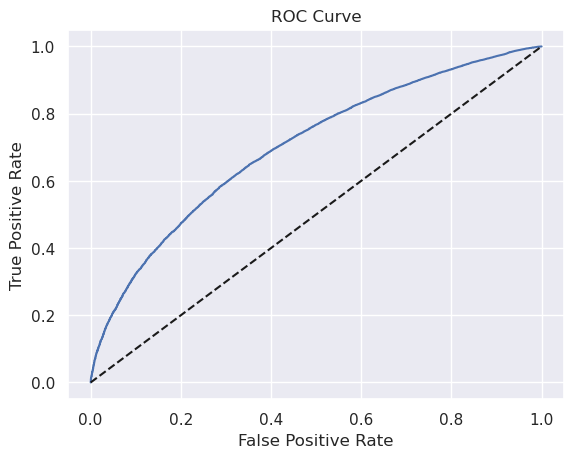

In [64]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle="--", color="k")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [66]:
AUROC = roc_auc_score(df_actual_predicted_proba["loan_data_targets_test"], df_actual_predicted_proba["y_hat_test_proba"])
AUROC

0.7017789162307977

## Gini nad Kolmogorov-Smirnov

In [67]:
df_actual_predicted_proba = df_actual_predicted_proba.sort_values("y_hat_test_proba")

In [68]:
df_actual_predicted_proba.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
11208,0,0.494817,0
118702,1,0.495139,0
41663,1,0.499606,0
210472,0,0.505942,0
2808,0,0.507809,0


In [69]:
df_actual_predicted_proba.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
261095,0,0.990635,1
231463,1,0.991017,1
239228,1,0.991254,1
261086,1,0.992052,1
242624,1,0.992566,1


In [70]:
df_actual_predicted_proba = df_actual_predicted_proba.reset_index()

In [71]:
df_actual_predicted_proba["Cumulative N Population"] = df_actual_predicted_proba.index + 1
df_actual_predicted_proba["Cumulative N Good"] = df_actual_predicted_proba["loan_data_targets_test"].cumsum()
df_actual_predicted_proba["Cumulative N Bad"] = df_actual_predicted_proba["Cumulative N Population"] - df_actual_predicted_proba["loan_data_targets_test"].cumsum()

In [72]:
df_actual_predicted_proba.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,11208,0,0.494817,0,1,0,1
1,118702,1,0.495139,0,2,1,1
2,41663,1,0.499606,0,3,2,1
3,210472,0,0.505942,0,4,2,2
4,2808,0,0.507809,0,5,2,3


In [73]:
df_actual_predicted_proba["Cumulative Perc Population"] = df_actual_predicted_proba["Cumulative N Population"] / (df_actual_predicted_proba.shape[0])
df_actual_predicted_proba["Cumulative Perc Good"] = df_actual_predicted_proba["Cumulative N Good"] / df_actual_predicted_proba["loan_data_targets_test"].sum()
df_actual_predicted_proba["Cumulative Perc Bad"] = df_actual_predicted_proba["Cumulative N Bad"] / (df_actual_predicted_proba.shape[0] - df_actual_predicted_proba["loan_data_targets_test"].sum())

In [87]:
df_actual_predicted_proba.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,11208,0,0.494817,0,1,0,1,0.000011,0.000000,0.000098
1,118702,1,0.495139,0,2,1,1,0.000021,0.000012,0.000098
2,41663,1,0.499606,0,3,2,1,0.000032,0.000024,0.000098
3,210472,0,0.505942,0,4,2,2,0.000043,0.000024,0.000196
4,2808,0,0.507809,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

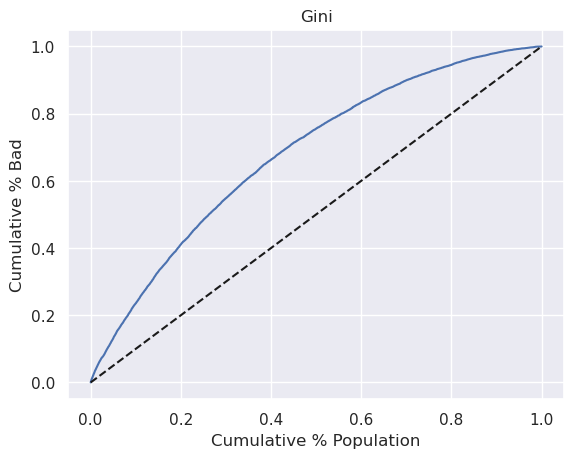

In [80]:
plt.plot(df_actual_predicted_proba["Cumulative Perc Population"], df_actual_predicted_proba["Cumulative Perc Bad"])
plt.plot(df_actual_predicted_proba["Cumulative Perc Population"], df_actual_predicted_proba["Cumulative Perc Population"], linestyle="--", color='k')

plt.xlabel("Cumulative % Population")
plt.ylabel("Cumulative % Bad")
plt.title("Gini")

In [81]:
Gini = AUROC*2 - 1

In [82]:
Gini

0.4035578324615954

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

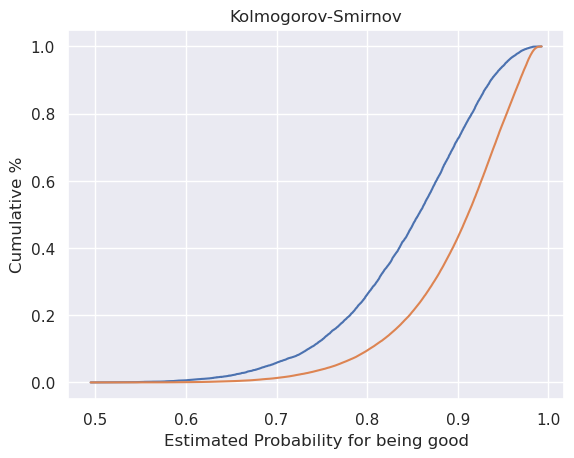

In [84]:
plt.plot(df_actual_predicted_proba["y_hat_test_proba"], df_actual_predicted_proba["Cumulative Perc Bad"])
plt.plot(df_actual_predicted_proba["y_hat_test_proba"], df_actual_predicted_proba["Cumulative Perc Good"])
plt.xlabel("Estimated Probability for being good")
plt.ylabel("Cumulative %")
plt.title("Kolmogorov-Smirnov")

In [85]:
KS = max(df_actual_predicted_proba["Cumulative Perc Bad"] - df_actual_predicted_proba["Cumulative Perc Good"])

In [86]:
KS

0.2968000044137137